In [3]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##load clean data
file_name = 'clean_data.csv'
df = pd.read_csv(file_name)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,drive
0,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,fwd
1,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,fwd
2,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,fwd
3,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,fwd
4,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,rwd


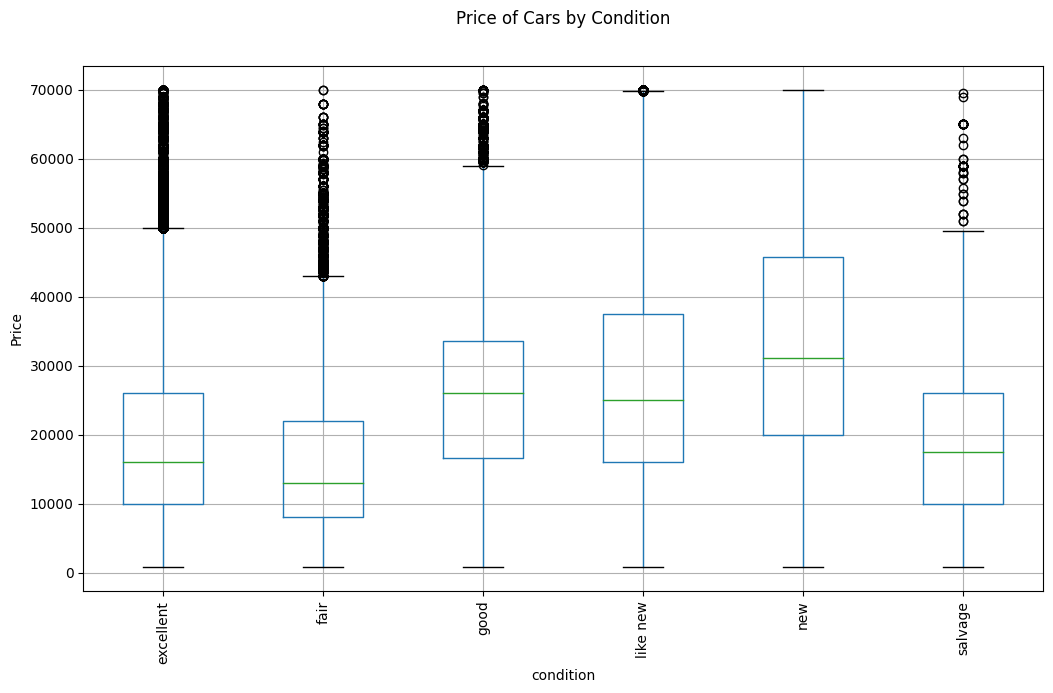

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270823 entries, 0 to 270822
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         270823 non-null  int64  
 1   year          270823 non-null  float64
 2   manufacturer  270823 non-null  object 
 3   model         270823 non-null  object 
 4   condition     270823 non-null  object 
 5   cylinders     270823 non-null  object 
 6   fuel          270823 non-null  object 
 7   odometer      270823 non-null  float64
 8   drive         270823 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.6+ MB


In [4]:
## Inspect car price based on condition

fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('price', 'condition', ax=ax)
plt.suptitle('Price of Cars by Condition')
plt.title('')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()
df.info()

In [5]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
drive           0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

#manufacturer
le_manufacturer = LabelEncoder()
df['manufacturer'] = le_manufacturer.fit_transform(df['manufacturer'])


#model
le_model = LabelEncoder()
df['model'] = le_model.fit_transform(df['model'])

#condition
le_condition = LabelEncoder()
df['condition'] = le_condition.fit_transform(df['condition'])

#cylinders
le_cylinders = LabelEncoder()
df['cylinders'] = le_cylinders.fit_transform(df['cylinders'])

#fuel
le_fuel = LabelEncoder()
df['fuel'] = le_fuel.fit_transform(df['fuel'])

#drive
le_drive = LabelEncoder()
df['drive'] = le_drive.fit_transform(df['drive'])

array([14,  7, 39, 13, 20, 31, 34, 25,  6, 16, 10, 23, 19,  5, 41,  3, 18,
       24,  1, 37,  0, 17,  8, 26,  4, 29, 33, 21, 40, 28, 32, 12, 35, 38,
       27, 36, 15,  9,  2, 22, 30, 11])

In [7]:
df['model'].unique()

array([16932, 17183, 17219, ...,  2773, 11540,  4208])

In [8]:
X = df.drop("price", axis=1)
y = df["price"]

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y.values)

LinearRegression()

In [10]:
y_pred = model.predict(X)

In [11]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [13]:
error

10680.968073415665

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270823 entries, 0 to 270822
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         270823 non-null  int64  
 1   year          270823 non-null  float64
 2   manufacturer  270823 non-null  int64  
 3   model         270823 non-null  int64  
 4   condition     270823 non-null  int64  
 5   cylinders     270823 non-null  int64  
 6   fuel          270823 non-null  int64  
 7   odometer      270823 non-null  float64
 8   drive         270823 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 18.6 MB


In [46]:
y_pred = rf_model.predict(P)

/Users/bmukum/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but RandomForestRegressor is expecting 8 features as input.

In [15]:
from scipy import stats
I = np.array([[2020, "toyota", "pickup", "new" , "8 cylinders", "gas", 5444, "fwd"]])
I[:, 1] = le_manufacturer.transform(I[:, 1])
I[:, 2] = le_model.transform(I[:, 2])
I[:, 3] = le_condition.transform(I[:, 3])
I[:, 4] = le_cylinders.transform(I[:, 4])
I[:, 5] = le_fuel.transform(I[:, 5])
I[:, 7] = le_drive.transform(I[:, 7])
I = I.astype(float)
test_y_pred = model.predict(I)

/Users/bmukum/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
I

array([[2.0200e+03, 3.9000e+01, 1.4969e+04, 4.0000e+00, 6.0000e+00,
        2.0000e+00, 5.4440e+03, 1.0000e+00]])

In [18]:
test_y_pred

array([36601.72274079])

In [19]:
import pickle
data = {"model": model, "le_manufacturer":le_manufacturer,"le_model":le_model, "le_condition":le_condition, "le_cylinders":le_cylinders, "le_fuel":le_fuel, "le_drive":le_drive }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

    

In [20]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    regressor_loaded = data["model"]
    le_manufacturer = data["le_manufacturer"]
    le_model = data["le_model"]
    le_condition = data["le_condition"]
    le_cylinders = data["le_cylinders"]
    le_fuel = data["le_fuel"]
    le_drive = data["le_drive"]

In [21]:
y_pred = regressor_loaded.predict(X)
y_pred

array([27254.56604497, 24364.25639738, 35163.20997952, ...,
       39433.5526383 , 29455.33858101, 29153.98294386])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270823 entries, 0 to 270822
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         270823 non-null  int64  
 1   year          270823 non-null  float64
 2   manufacturer  270823 non-null  int64  
 3   model         270823 non-null  int64  
 4   condition     270823 non-null  int64  
 5   cylinders     270823 non-null  int64  
 6   fuel          270823 non-null  int64  
 7   odometer      270823 non-null  float64
 8   drive         270823 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 18.6 MB


In [23]:
df.year.value_counts()

2018.0    30481
2017.0    29604
2016.0    24351
2015.0    23026
2019.0    21540
          ...  
1910.0        2
1918.0        1
1943.0        1
1915.0        1
1945.0        1
Name: year, Length: 109, dtype: int64

In [24]:
print(df['manufacturer'].unique())

[14  7 39 13 20 31 34 25  6 16 10 23 19  5 41  3 18 24  1 37  0 17  8 26
  4 29 33 21 40 28 32 12 35 38 27 36 15  9  2 22 30 11]


In [25]:
print(df['drive'].unique())

[1 2 0]


In [26]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,drive
0,33590,2014.0,14,16932,2,6,2,57923.0,1
1,22590,2010.0,7,17183,2,6,2,71229.0,1
2,39590,2020.0,7,17219,2,6,2,19160.0,1
3,30990,2017.0,39,19337,2,6,2,41124.0,1
4,15000,2013.0,13,9971,0,5,2,128000.0,2
